In [3]:
# NLP and Native Bayes

[nltk_data] Downloading package stopwords to C:\Users\Shreyas
[nltk_data]     Mahale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Shape: (2000, 2)
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Category Distribution:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk

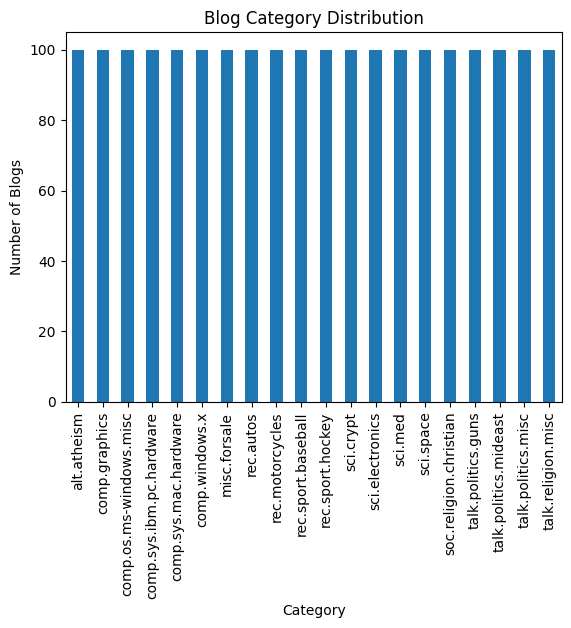


Accuracy: 0.8375

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0

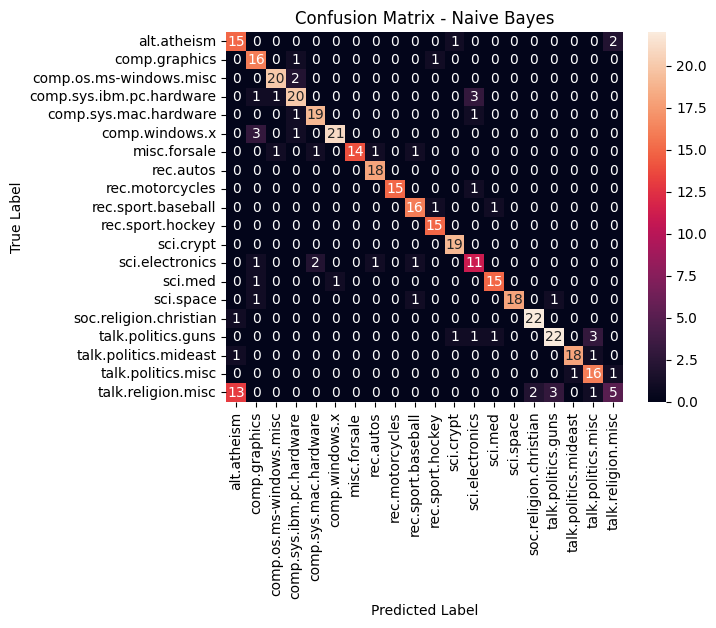

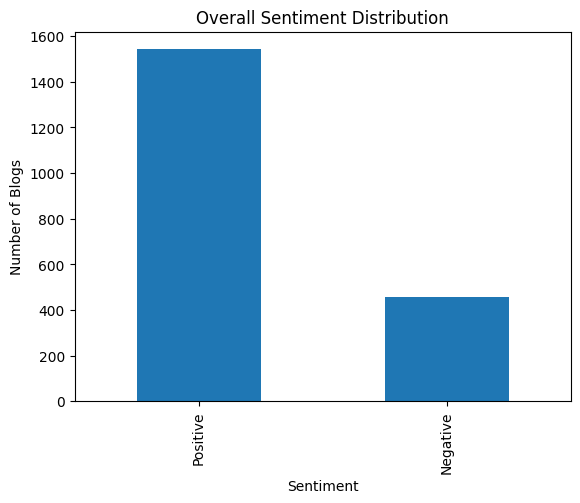

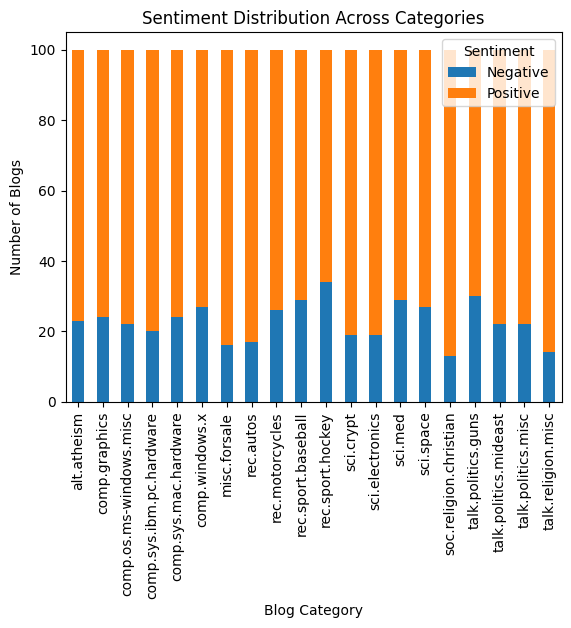


Final Dataset Sample:
                                                Data       Labels Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism  Positive


In [4]:
# =========================================================
# TEXT CLASSIFICATION USING NAIVE BAYES
# + SENTIMENT ANALYSIS WITH VISUALIZATIONS
# =========================================================

# -----------------------------
# 1. Import Required Libraries
# -----------------------------
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob

# Download stopwords
nltk.download('stopwords')

# -----------------------------
# 2. Load Dataset
# -----------------------------
df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/blogs.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# -----------------------------
# 3. Data Exploration
# -----------------------------
print("\nCategory Distribution:")
print(df['Labels'].value_counts())

# -----------------------------
# 4. Visualization: Category Distribution
# -----------------------------
plt.figure()
df['Labels'].value_counts().plot(kind='bar')
plt.title("Blog Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Blogs")
plt.show()

# -----------------------------
# 5. Text Preprocessing
# -----------------------------
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_text'] = df['Data'].apply(clean_text)

# -----------------------------
# 6. Feature Extraction (TF-IDF)
# -----------------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Labels']

# -----------------------------
# 7. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 8. Train Naive Bayes Model
# -----------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# -----------------------------
# 9. Predictions & Evaluation
# -----------------------------
y_pred = nb_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -----------------------------
# 10. Visualization: Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------
# 11. Sentiment Analysis
# -----------------------------
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)

# -----------------------------
# 12. Visualization: Sentiment Distribution
# -----------------------------
plt.figure()
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Blogs")
plt.show()

# -----------------------------
# 13. Visualization: Sentiment vs Category
# -----------------------------
sentiment_category = pd.crosstab(df['Labels'], df['Sentiment'])

sentiment_category.plot(kind='bar', stacked=True)
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Blog Category")
plt.ylabel("Number of Blogs")
plt.legend(title="Sentiment")
plt.show()

# -----------------------------
# 14. Final Dataset Preview
# -----------------------------
print("\nFinal Dataset Sample:")
print(df[['Data', 'Labels', 'Sentiment']].head())